In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['figure.figsize'] = [10, 5]

In [62]:
y_t = pd.read_csv('target_outputs.csv', header=None)
y_h = pd.read_csv('predicted_outputs.csv', header=None)


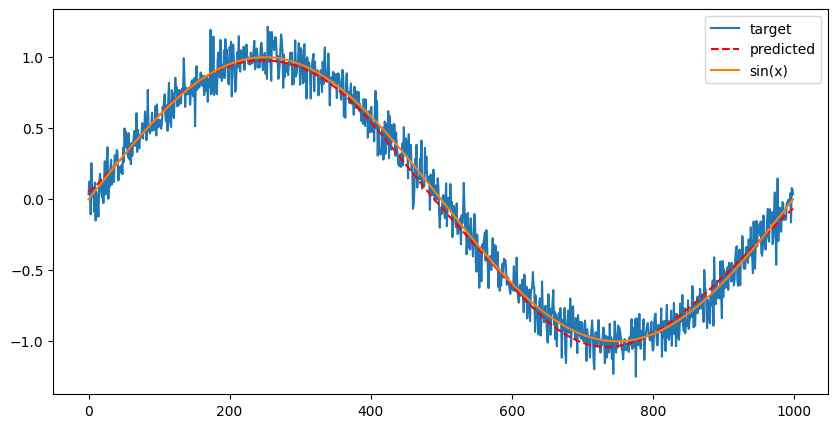

In [63]:
plt.plot(y_t[0], label = 'target')
plt.plot(y_h[0], '--r', label = 'predicted')

x = np.linspace(0, 2*np.pi, 1000)

plt.plot(np.sin(x), label = 'sin(x)')
plt.legend();

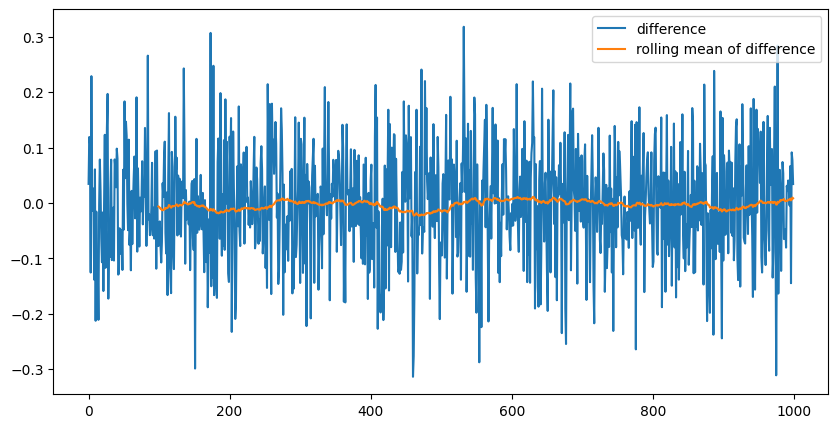

In [64]:
plt.plot(y_t[0] - np.sin(x), label='difference')
plt.plot((y_t[0] - np.sin(x)).rolling(100).mean(), label='rolling mean of difference')
plt.legend();

In [65]:
stats.normaltest(y_t[0] - np.sin(x))

NormaltestResult(statistic=0.155091944264542, pvalue=0.9253844815209651)

if p value is less than 0.05 then we can reject the null hypothesis that the residuals are normal
of course this is expected here since we generated the residuals to be normally distributed with mean 0 and std 0.1

In [66]:
np.mean(y_t[0] - np.sin(x)), np.var(y_t[0] - np.sin(x))

(-0.0029292716700000006, 0.009994160075878628)

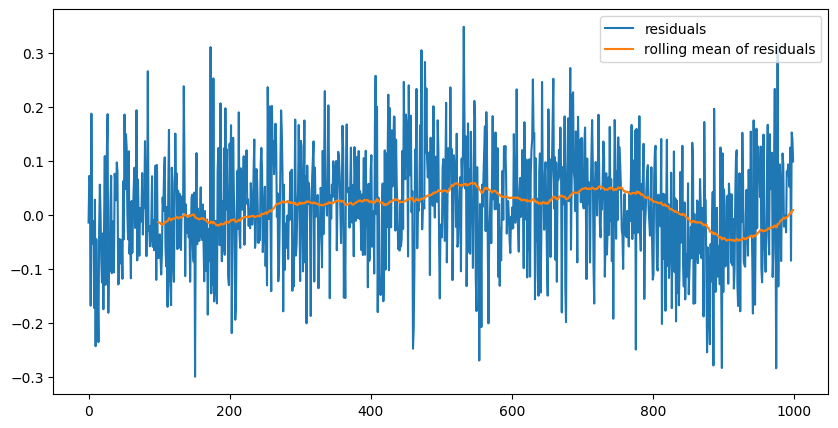

In [67]:
plt.plot(y_t[0] - y_h[0], label='residuals')
plt.plot((y_t[0] - y_h[0]).rolling(100).mean(), label='rolling mean of residuals')
plt.legend();

In [68]:
stats.normaltest(y_t[0] - y_h[0])

NormaltestResult(statistic=0.4482660023975537, pvalue=0.7992088315676502)

In [69]:
np.mean(y_t[0] - y_h[0]), np.var(y_t[0] - y_h[0])

(0.013417385147, 0.010868351585858757)

the neural network is doing a good job at predicting the actual sin curve and not overfitting to the noise

In [70]:
log = pd.read_csv('log.csv', index_col='Iteration')

In [71]:
log

,TrainCost,TestCost
Iteration,,
0,0.060960,0.075487
1024,0.079378,0.067435
2048,0.063105,0.063600
3072,0.070825,0.063059
4096,0.057490,0.058733
...,...,...
405504,0.001323,0.000182
406528,0.001547,0.000077
407552,0.001424,0.000113


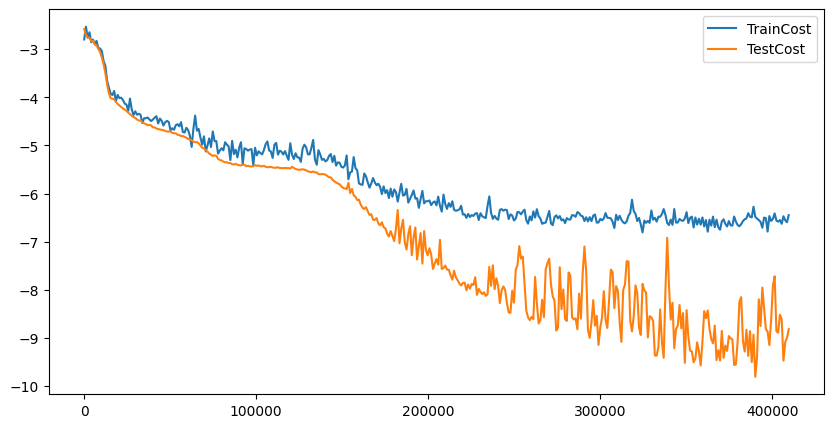

In [72]:
plt.plot(np.log(log["TrainCost"]), label="TrainCost")
plt.plot(np.log(log["TestCost"]), label="TestCost")
plt.legend();